In [ ]:
# Name: Cian Morar
# Student Num: C16460726

In [ ]:
# Install packages
# install.packages("plyr")
# install.packages("dplyr")
# install.packages("ggplot2")
# install.packages("ggpubr")
# install.packages(c("Rcpp","tidyverse"))
# install.packages("scales")

In [1]:
# Load in libraries
library(plyr)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(ggpubr)


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.4
v tibble  3.0.0     v stringr 1.4.0
v tidyr   1.0.2     v forcats 0.5.0
v readr   1.3.1     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filter()    masks stats::filter()
x dplyr::id()        masks plyr::id()
x dplyr::lag()       masks stats::lag()
x dplyr::mutate()    masks plyr::mutate()
x dplyr::rename()    masks plyr::r

In [2]:
# Load in the datasets
df1 = read.csv("./Data/National_Health_Interview_Survey_NHIS_National_Cardiovascular_Disease_Surveillance_Data.csv", header=TRUE, sep=',', fileEncoding="latin1")
df2 = read.csv("./Data/Behavioral_Risk_Factor_Data_Heart_Disease_Stroke_Prevention.csv", header=TRUE, sep=',', fileEncoding="latin1")

In [3]:
# Ensure that the spelling of the columns are the same
names(df2) = names(df1)

In [4]:
# Transpose the dataframes and then combine them
fulldf <- rbind(df1, df2)

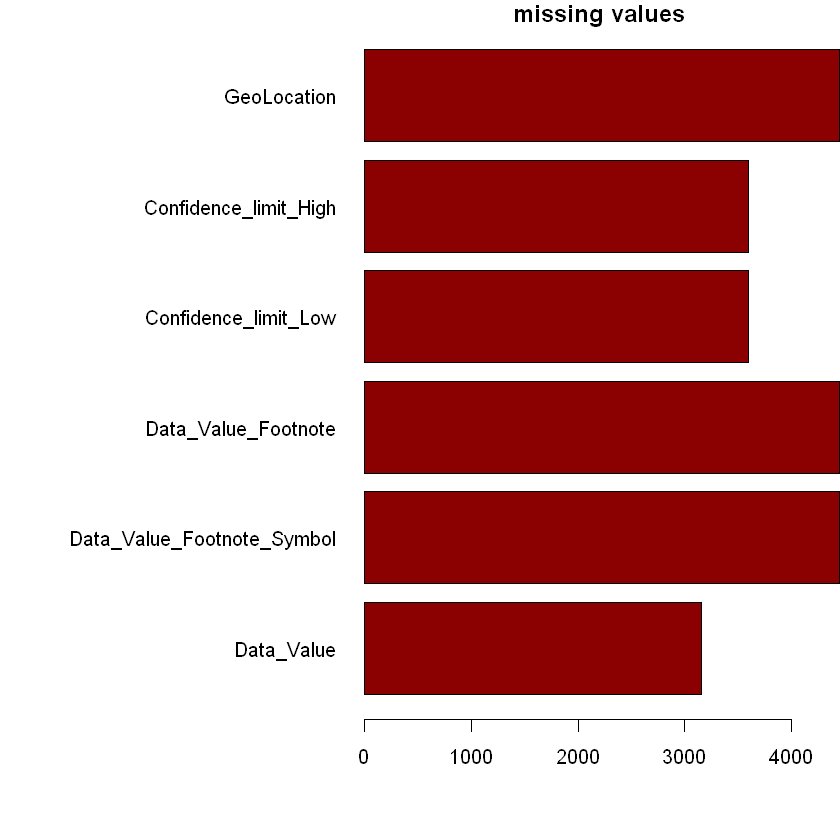

In [5]:
miss <- colSums(is.na(fulldf))
# miss[miss != 0]
# names(miss)

par(mar=c(5,15,1,0))
barplot(miss[miss != 0],
main = "missing values",
xlab = "",
names.arg = names(miss[miss != 0]),
col = "darkred",
las = 1,
horiz = TRUE)

In [6]:
# Omit the missing values
fulldf <- fulldf %>%
na.omit()
dim(fulldf)

[1] 31482    27

In [9]:
# Extract all the numerical columns
numeric <- unlist(lapply(fulldf, is.numeric))
numerical <- fulldf[, numeric]

In [ ]:
# Check for a primary key
distinct(fulldf, Year, LocationID) # 283 rows
select(fulldf[which(fulldf$Year==2000),], Year, LocationID) # 275 rows

# LocationID is not unique


In [ ]:
# Add a custom primary key

In [ ]:
plot(fulldf$Year, fulldf$Data_Value)
plot(fulldf$Confidence_limit_Low)
plot(fulldf$Confidence_limit_High)

[1] "Year"                  "Data_Value"            "Confidence_limit_Low" 
[4] "Confidence_limit_High" "LocationID"

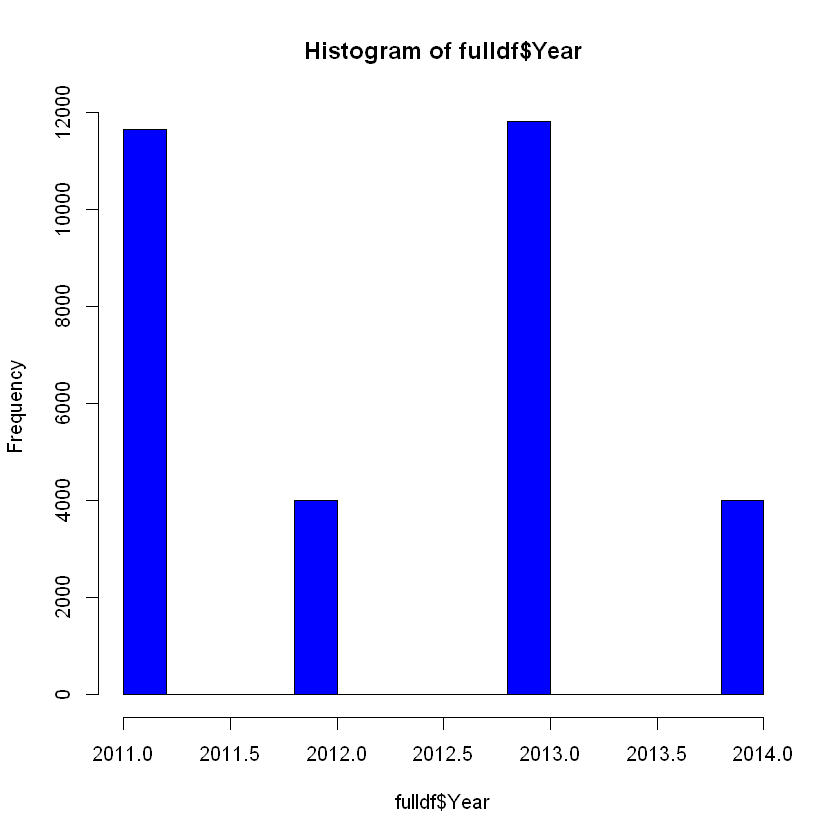

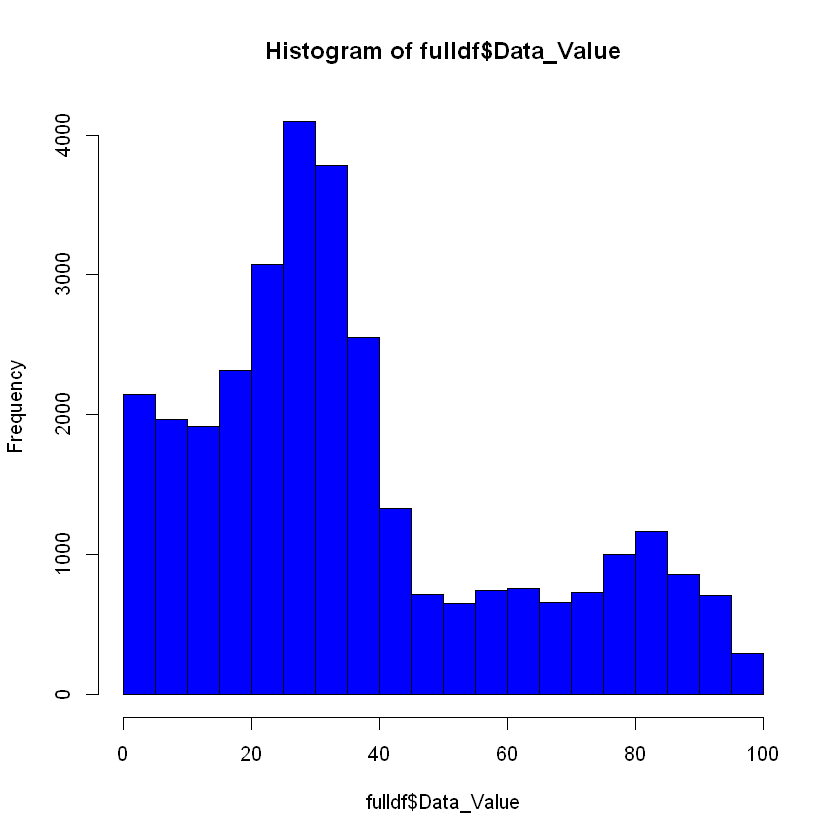

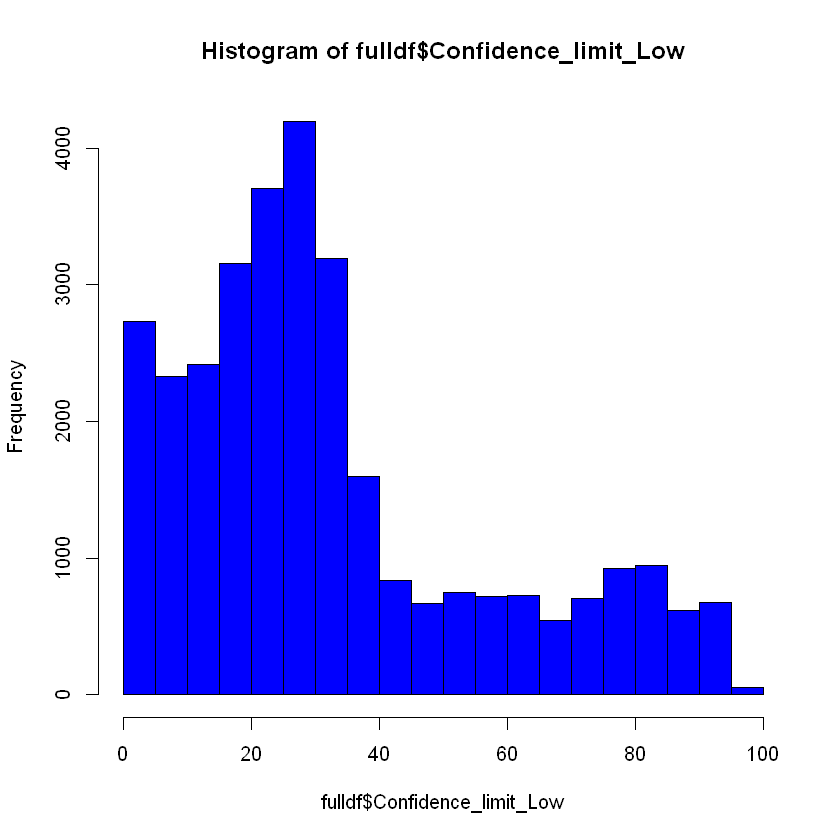

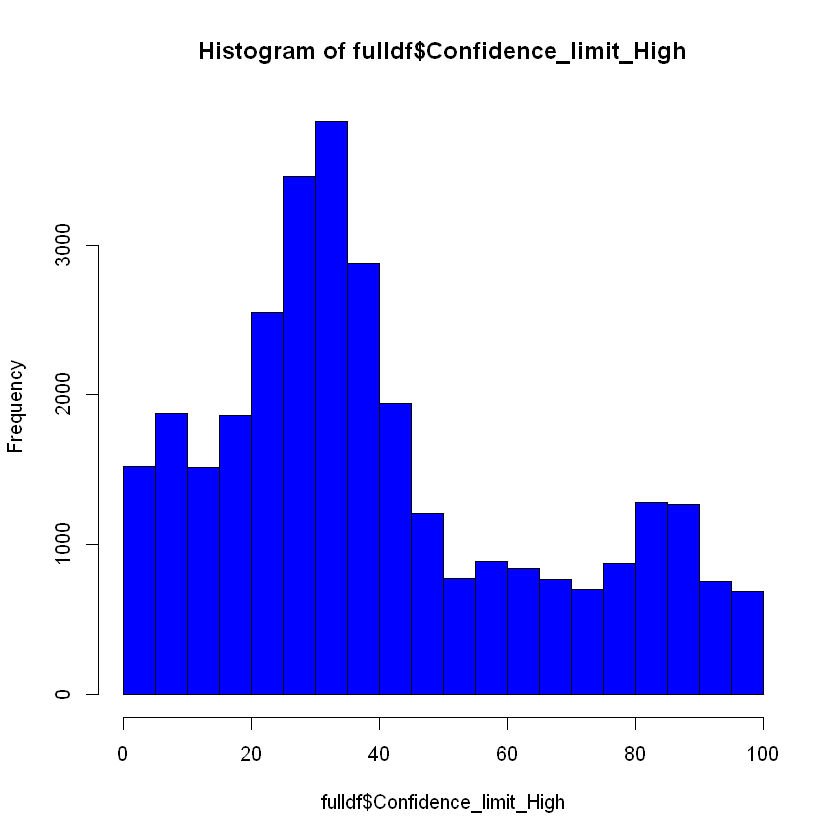

In [13]:
names(numerical)

# Majority of data is from 2011-2014 so itsnot a big deal to drop 
# the others becuase  of their missing values
hist(fulldf$Year, col="blue")

# Slightly negatively skewed, although it is close to having a 
# normal distribution, i.e. no need to reshape this
hist(fulldf$Data_Value, col="blue")


hist(fulldf$Confidence_limit_Low, col="blue")


hist(fulldf$Confidence_limit_High, col="blue")

In [ ]:
# Correlation graph between numerical columns
